In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.transform import resize
import CA_model
import iceing
import evaluation

## CA model

In [2]:
size = 1000

Ht_0 = np.random.normal(loc = 0.15, scale = 0.1, size = (int(size/10), int(size/10)))
Ht_0 = resize(Ht_0, (size, size))
Ht_0 = np.heaviside(Ht_0, 0) * Ht_0 + 0.1

# Ht_0 = np.random.normal(loc = 0.15, scale = 0.1, size = (size, size))
h = np.zeros(shape = (size, size))


In [3]:
ca_model = CA_model.CA_model(Ht_0, h, dt = 10, dx = 1)

In [4]:
h, H, Ht = ca_model.run(50_000)

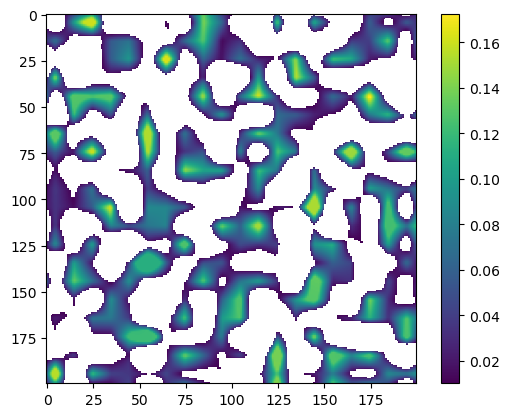

In [ ]:
plt.imshow(np.ma.masked_where(h<=0.01, h))
plt.colorbar()

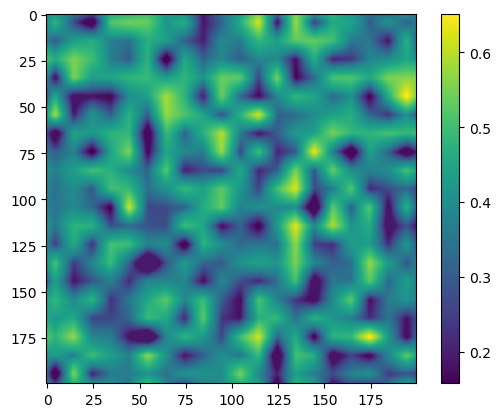

In [ ]:
plt.imshow(np.ma.masked_where(H<=0, H))
plt.colorbar()

## Evaluation CA

In [ ]:
areas_ca, perimeters_ca = evaluation.perim_area(np.where(h>0, -1, 1), pond_val = -1, ice_val = 1)

In [ ]:
plt.scatter(areas_ca, perimeters_ca)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

## Ising model

In [ ]:
iceing_test = iceing.iceing_model(0.45, 1000)

In [ ]:
ponds, sums = iceing_test.run(15_000_000)

In [ ]:
# make a color map of fixed colors
cmap = colors.ListedColormap(['blue', 'white'])
bounds=[-100,0,100]
norm = colors.BoundaryNorm(bounds, cmap.N)

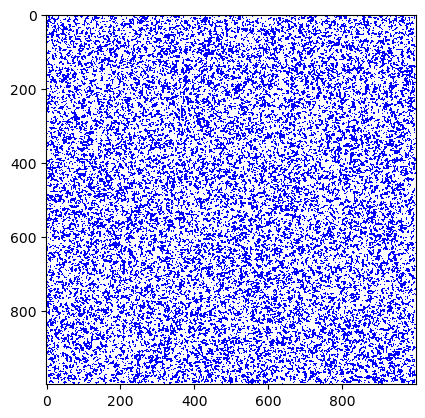

In [ ]:
# plot ponds
plt.imshow(ponds, cmap=cmap, norm=norm)

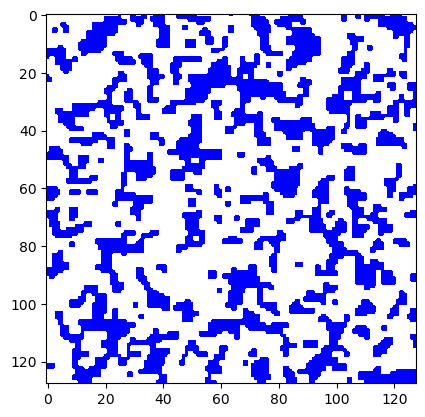

In [ ]:
# zoom in
plt.imshow(ponds[100:228,100:228], cmap=cmap, norm=norm)

## Evaluation Ising
Fractal dimension plot is still missing.

In [ ]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

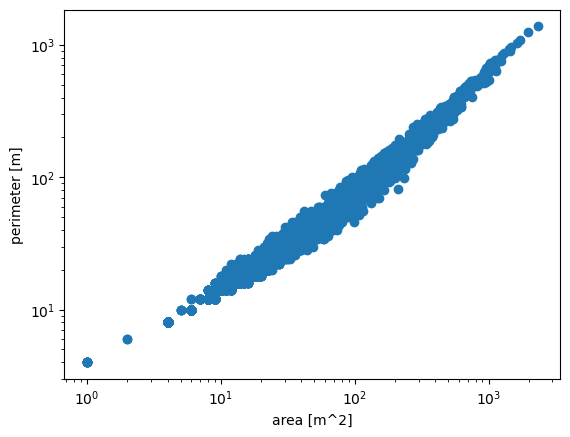

In [ ]:
plt.scatter(areas_ising, perimeters_ising)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

## For fun
Just a normal distribution with the heaviside function.

In [ ]:
size = 1000
h = np.random.normal(loc = 0.5, scale = 1, size = (int(size/3), int(size/3)))
h = resize(h, (size, size))
h = np.heaviside(h-0.6, 0) * h

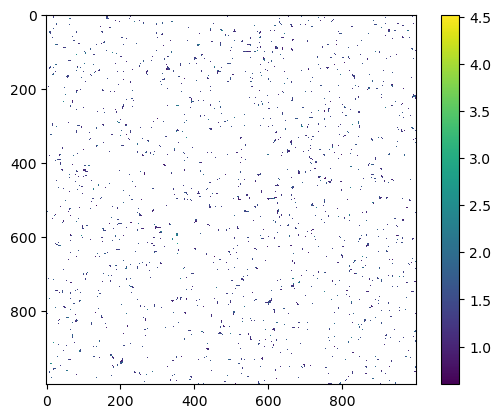

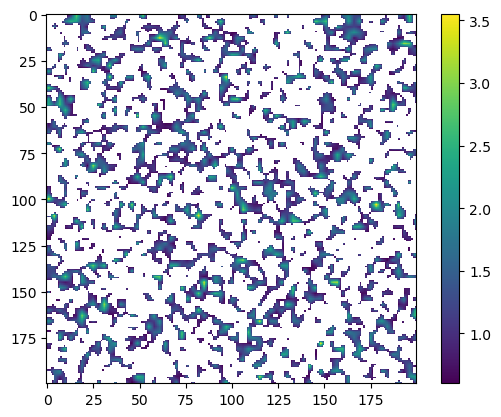

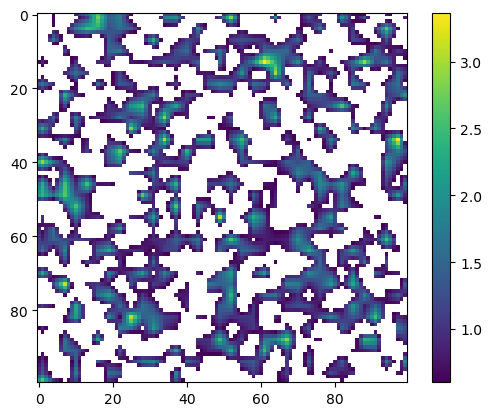

In [ ]:
plt.figure()
plt.imshow(np.ma.masked_where(h<=0, h))
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.ma.masked_where(h[:200, :200]<=0, h[:200, :200]))
plt.colorbar()
plt.show()
plt.imshow(np.ma.masked_where(h[:100, :100]<=0, h[:100, :100]))
plt.colorbar()
plt.show()

In [ ]:
areas_norm, perimeters_norm = evaluation.perim_area(np.where(h>0, -1, 1), pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

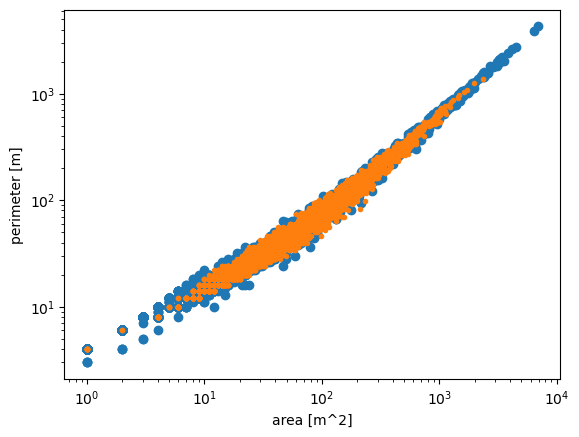

In [ ]:
plt.scatter(areas_norm, perimeters_norm, marker='x')
plt.scatter(areas_ca, perimeters_ca)
plt.scatter(areas_ising, perimeters_ising, marker='.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')